Training CNN model based on all news channel

In [10]:
# import libraries
import os
import cv2
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator




In [9]:
import os
import pandas as pd

# Set the paths to your "good" and "bad" parent folders
good_parent_folder = r'/content/drive/MyDrive/news/good_news_data_images'
bad_parent_folder = r'/content/drive/MyDrive/news/all_bad_news_images'

# Function to load images and label them
def load_images_and_label(folder_path, label):
    image_paths = []
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith(".jpg"):  # Adjust the file extension as needed
                image_paths.append(os.path.join(root, file))
    df = pd.DataFrame({'Image_Path': image_paths, 'Label': label})
    return df

# Load "good" images and label them as "good", selecting approximately 6800 rows randomly
df_good = load_images_and_label(good_parent_folder, 'good').sample(n=6800, random_state=1)

# Load "bad" images and label them as "bad"
df_bad = load_images_and_label(bad_parent_folder, 'bad')

# Concatenate the dataframes
df = pd.concat([df_good, df_bad], ignore_index=True)

# Display the head of the dataframe
print(df.head())

                                          Image_Path Label
0  /content/drive/MyDrive/news/good_news_data_ima...  good
1  /content/drive/MyDrive/news/good_news_data_ima...  good
2  /content/drive/MyDrive/news/good_news_data_ima...  good
3  /content/drive/MyDrive/news/good_news_data_ima...  good
4  /content/drive/MyDrive/news/good_news_data_ima...  good


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
df

,Image_Path,Label
0,/content/drive/MyDrive/news/good_news_data_ima...,good
1,/content/drive/MyDrive/news/good_news_data_ima...,good
2,/content/drive/MyDrive/news/good_news_data_ima...,good
3,/content/drive/MyDrive/news/good_news_data_ima...,good
4,/content/drive/MyDrive/news/good_news_data_ima...,good
...,...,...
13431,/content/drive/MyDrive/news/all_bad_news_image...,bad
13432,/content/drive/MyDrive/news/all_bad_news_image...,bad
13433,/content/drive/MyDrive/news/all_bad_news_image...,bad
13434,/content/drive/MyDrive/news/all_bad_news_image...,bad


In [12]:
df.sample(2)

,Image_Path,Label
4287,/content/drive/MyDrive/news/good_news_data_ima...,good
6092,/content/drive/MyDrive/news/good_news_data_ima...,good


In [14]:
def preprocess_image(image_path, target_size=(224, 224)):
    # Read the image using OpenCV
    image = cv2.imread(image_path)

    # Resize the image to the target size
    image = cv2.resize(image, target_size)

    # Normalize pixel values to be in the range [0, 1]
    image = image.astype('float32') / 255.0

    return image

# Subsample the training data
df_train_subsampled = df.sample(n=1000, random_state=42)  # Adjusting the sample size as we needed

# Apply preprocessing to all images in the subsampled DataFrame
df_train_subsampled['Processed_Image'] = df_train_subsampled['Image_Path'].apply(preprocess_image)

# Convert labels to numerical format using LabelEncoder
label_encoder = LabelEncoder()
df_train_subsampled['Encoded_Label'] = label_encoder.fit_transform(df_train_subsampled['Label'])



# Assuming df is the original DataFrame containing the image paths and labels
# Subsample the validation data
df_val_subsampled = df.sample(n=300, random_state=42)

# # Apply preprocessing to all images in the subsampled DataFrame
df_val_subsampled['Processed_Image'] = df_val_subsampled['Image_Path'].apply(preprocess_image)

# Convert labels to numerical format using LabelEncoder
label_encoder = LabelEncoder()
df_val_subsampled['Encoded_Label'] = label_encoder.fit_transform(df_val_subsampled['Label'])



In [16]:
df_train_subsampled

,Image_Path,Label,Processed_Image,Encoded_Label
9030,/content/drive/MyDrive/news/all_bad_news_image...,bad,"[[[0.5372549, 0.53333336, 0.47843137], [0.4941...",0
12968,/content/drive/MyDrive/news/all_bad_news_image...,bad,"[[[0.11372549, 0.105882354, 0.011764706], [0.1...",0
3817,/content/drive/MyDrive/news/good_news_data_ima...,good,"[[[0.49803922, 0.4392157, 0.101960786], [0.498...",1
11009,/content/drive/MyDrive/news/all_bad_news_image...,bad,"[[[0.33333334, 0.34901962, 0.32941177], [0.501...",0
1493,/content/drive/MyDrive/news/good_news_data_ima...,good,"[[[0.5372549, 0.6156863, 0.7137255], [0.545098...",1
...,...,...,...,...
5792,/content/drive/MyDrive/news/good_news_data_ima...,good,"[[[0.29803923, 0.24313726, 0.101960786], [0.29...",1
9412,/content/drive/MyDrive/news/all_bad_news_image...,bad,"[[[0.047058824, 0.02745098, 0.03137255], [0.04...",0
5304,/content/drive/MyDrive/news/good_news_data_ima...,good,"[[[0.007843138, 0.14901961, 0.16078432], [0.0,...",1
5651,/content/drive/MyDrive/news/good_news_data_ima...,good,"[[[0.30588236, 0.30588236, 0.30588236], [0.305...",1


In [19]:
df_val_subsampled

,Image_Path,Label,Processed_Image,Encoded_Label
9030,/content/drive/MyDrive/news/all_bad_news_image...,bad,"[[[0.5372549, 0.53333336, 0.47843137], [0.4941...",0
12968,/content/drive/MyDrive/news/all_bad_news_image...,bad,"[[[0.11372549, 0.105882354, 0.011764706], [0.1...",0
3817,/content/drive/MyDrive/news/good_news_data_ima...,good,"[[[0.49803922, 0.4392157, 0.101960786], [0.498...",1
11009,/content/drive/MyDrive/news/all_bad_news_image...,bad,"[[[0.33333334, 0.34901962, 0.32941177], [0.501...",0
1493,/content/drive/MyDrive/news/good_news_data_ima...,good,"[[[0.5372549, 0.6156863, 0.7137255], [0.545098...",1
...,...,...,...,...
10500,/content/drive/MyDrive/news/all_bad_news_image...,bad,"[[[0.58431375, 0.5882353, 0.5803922], [0.39215...",0
1418,/content/drive/MyDrive/news/good_news_data_ima...,good,"[[[0.59607846, 0.5764706, 0.63529414], [0.6196...",1
4387,/content/drive/MyDrive/news/good_news_data_ima...,good,"[[[1.0, 0.99607843, 0.99607843], [1.0, 0.99607...",1
518,/content/drive/MyDrive/news/good_news_data_ima...,good,"[[[0.3254902, 0.25490198, 0.25882354], [0.3254...",1


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an instance of the ImageDataGenerator
datagen = ImageDataGenerator(
    rescale=1./255,  # Rescale pixel values to [0, 1]
    rotation_range=40,  # Rotate images by 40 degrees
    width_shift_range=0.2,  # Shift images horizontally by 20%
    height_shift_range=0.2,  # Shift images vertically by 20%
    shear_range=0.2,  # Shear transformation
    zoom_range=0.2,  # Zoom in on images by 20%
    horizontal_flip=True,  # Flip images horizontally
    fill_mode='nearest'  # Fill in newly created pixels
)

# Create a generator for training data
train_generator = datagen.flow_from_dataframe(
    dataframe=df_train_subsampled,  # Your training dataframe
    x_col="Image_Path",  # Column containing image file paths
    y_col="Label",  # Column containing labels
    target_size=(150, 150),  # Resize images to 150x150
    batch_size=32,  # Batch size
    class_mode='binary'  # Binary classification
)


In [32]:
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.layers import Dropout

# Update the build_and_compile_model function to handle binary classification correctly
def build_and_compile_model(input_shape=(224, 224, 3), learning_rate=0.003):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(layers.Dense(1, activation='sigmoid'))  # Use a sigmoid activation function and a single unit for binary classification
    optimizer = optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model



learning_rate = 0.003  # Set the initial learning rate
model = build_and_compile_model(input_shape=(224, 224, 3), learning_rate=learning_rate)

# Split the subsampled data into training and testing sets
X_train_subsampled, X_val_subsampled, y_train_subsampled, y_val_subsampled = train_test_split(
    np.array(df_train_subsampled['Processed_Image'].tolist()),
    df_train_subsampled['Encoded_Label'],
    test_size=0.2,
    random_state=42
)

# Shape of the training and validation sets
print(f"X_train_subsampled shape: {X_train_subsampled.shape}, y_train_subsampled shape: {y_train_subsampled.shape}")
print(f"X_val_subsampled shape: {X_val_subsampled.shape}, y_val_subsampled shape: {y_val_subsampled.shape}")


# Train your model
r = model.fit(X_train_subsampled, y_train_subsampled, epochs=20, batch_size=32, validation_data=(X_val_subsampled, y_val_subsampled))

X_train_subsampled shape: (800, 224, 224, 3), y_train_subsampled shape: (800,)
X_val_subsampled shape: (200, 224, 224, 3), y_val_subsampled shape: (200,)
Epoch 1/20
25/25 [==============================] - 3s 66ms/step - loss: 2.2879 - accuracy: 0.5525 - val_loss: 0.5905 - val_accuracy: 0.6500
Epoch 2/20
25/25 [==============================] - 1s 48ms/step - loss: 0.4955 - accuracy: 0.7613 - val_loss: 1.4130 - val_accuracy: 0.6100
Epoch 3/20
25/25 [==============================] - 1s 48ms/step - loss: 0.3988 - accuracy: 0.8263 - val_loss: 0.3913 - val_accuracy: 0.8200
Epoch 4/20
25/25 [==============================] - 1s 49ms/step - loss: 0.2073 - accuracy: 0.9275 - val_loss: 0.3926 - val_accuracy: 0.8400
Epoch 5/20
25/25 [==============================] - 1s 58ms/step - loss: 0.1402 - accuracy: 0.9575 - val_loss: 0.4291 - val_accuracy: 0.8150
Epoch 6/20
25/25 [==============================] - 1s 52ms/step - loss: 0.0713 - accuracy: 0.9787 - val_loss: 0.4668 - val_accuracy: 0.8250


In [33]:
# Define the path to the new thumbnail dataset in Google Drive
new_data_folder = '/content/drive/MyDrive/news/mixed_news_bad_good'

# Load and preprocess images from the new dataset
def preprocess_image_for_prediction(image_path, target_size=(224, 224)):
    image = cv2.imread(image_path)
    image = cv2.resize(image, target_size)
    image = image.astype('float32') / 255.0
    return image

# List the images in the new dataset folder
new_data_images = [f for f in os.listdir(new_data_folder) if f.endswith(('.jpg', '.jpeg', '.png'))]

# Load the trained model
model = build_and_compile_model()  # Replace with the actual path to your trained model

# Make predictions on the new dataset
predictions = []

for image_file in new_data_images:
    image_path = os.path.join(new_data_folder, image_file)
    processed_image = preprocess_image_for_prediction(image_path)
    processed_image = np.expand_dims(processed_image, axis=0)  # Add batch dimension
    prediction = model.predict(processed_image)
    predictions.append({'image_file': image_file, 'prediction': prediction[0][0]})

# Display the predictions
for result in predictions:
    print(f"Image: {result['image_file']}, Prediction: {result['prediction']}")

1/1 [==============================] - 0s 20ms/step
Image: 9CamvSUpx8I.jpg, Prediction: 0.5228407382965088
Image: 1iuZY4Rk780.jpg, Prediction: 0.5568291544914246
Image: _ajlHovOoPs.jpg, Prediction: 0.5368838906288147
Image: 2AjruLiSsec.jpg, Prediction: 0.5664526224136353
Image: 8Z6L0crGI7Q.jpg, Prediction: 0.5732977390289307
Image: 8Z44IWQfBv8.jpg, Prediction: 0.5147628784179688
Image: 8ML3oCQeIL0.jpg, Prediction: 0.5255107283592224
Image: 0fVn2vWAolg.jpg, Prediction: 0.533527672290802
Image: dbs6Xy7Ggpo.jpg, Prediction: 0.5363680720329285
Image: 8qwZBY4ddN8.jpg, Prediction: 0.5340912938117981
Image: 5-4NSRNEgf4.jpg, Prediction: 0.5339360237121582
Image: 6pd7EpspR7w.jpg, Prediction: 0.5403196215629578
Image: frame_0004.jpg, Prediction: 0.5286738872528076
Image: Copy of frame_0141.jpg, Prediction: 0.5746698379516602
Image: Copy of frame_0142.jpg, Prediction: 0.5297673940658569
Image: Copy of frame_0140.jpg, Prediction: 0.5687633156776428
Image: Copy of frame_0138.jpg, Prediction: 0.5803

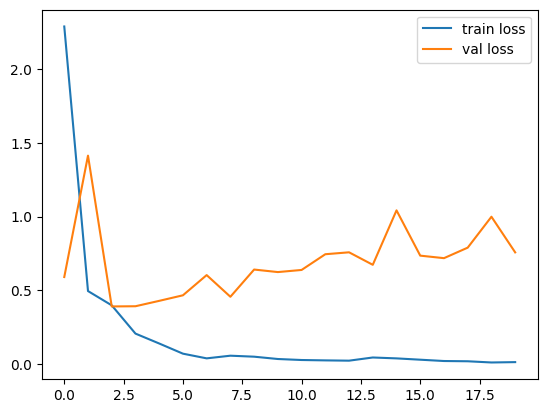

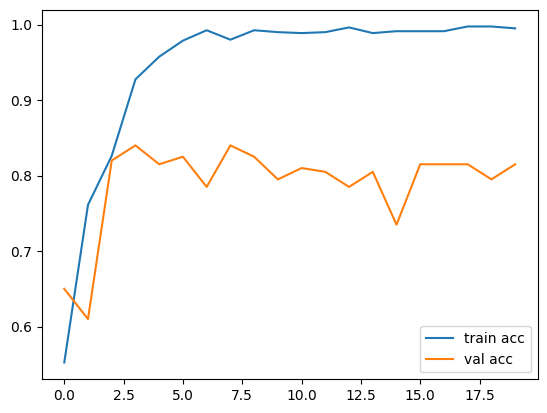

<Figure size 640x480 with 0 Axes>

In [34]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


### Saving optimization model and Loading the model

In [35]:
# Save the trained model
model.save('/content/drive/MyDrive/news/model_news_optimizer.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 83ms/step
[[0.5337196]]
The image is labeled as good with probability: 0.5337195992469788


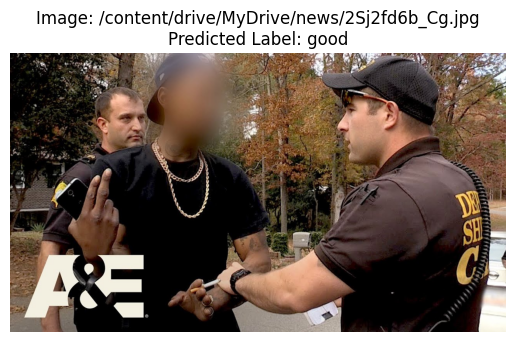

In [40]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load the saved model
saved_model_path2 = '/content/drive/MyDrive/news/model_news_optimizer.h5'
model = load_model(saved_model_path2)

# Define the path to the new image
img_path = '/content/drive/MyDrive/news/2Sj2fd6b_Cg.jpg'  # Replace with the actual path to your new image
img = image.load_img(img_path, target_size=(224, 224))  # Adjust the target size as needed
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img / 255.0  # Normalize the image

# Make a prediction
result = model.predict(img)
print(result)

# Check the prediction
threshold = 0.5
if result[0][0] > threshold:
    prediction = 'good'
    print(f'The image is labeled as good with probability: {result[0][0]}')
else:
    prediction = 'bad'
    print(f'The image is labeled as bad with probability: {result[0][0]}')

# Display the image and prediction
plt.imshow(cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB))
plt.title(f'Image: {img_path}\nPredicted Label: {prediction}')
plt.axis('off')
plt.show()


Below model is without dropout

### Saving Model

In [ ]:
# Save the trained model
# model.save('/content/drive/MyDrive/news/model_news.h5')

### Loading Model and testing for one image

1/1 [==============================] - 0s 66ms/step
[[0.51904947]]
The image is labeled as good with probability: 0.5190494656562805


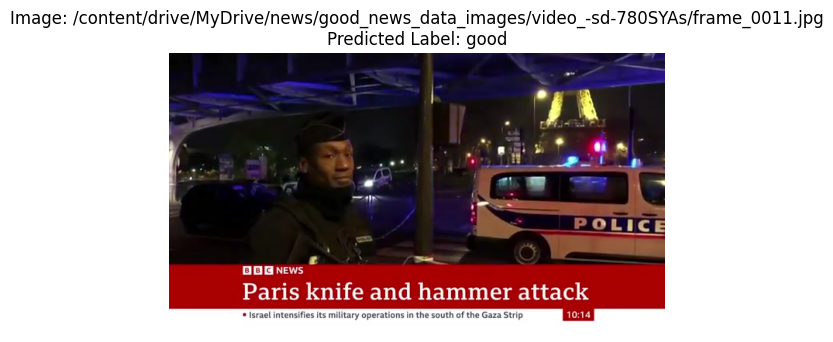

In [45]:
# Load the saved model
saved_model_path = '/content/drive/MyDrive/news/model_news.h5'
model = load_model(saved_model_path)

# Define the path to the new image
img_path = '/content/drive/MyDrive/news/good_news_data_images/video_-sd-780SYAs/frame_0011.jpg'  # Replace with the actual path to your new image
img = image.load_img(img_path, target_size=(224, 224))  # Adjust the target size as needed
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img/255.0  # Normalize the image

# Make a prediction
result = model.predict(img)
print(result)
threshold = 0.5
if result[0][0] > threshold:
    prediction = 'good'
    print(f'The image is labeled as good with probability: {result[0][0]}')
else:
    prediction = 'bad'
    print(f'The image is labeled as bad with probability: {result[0][0]}')

# Display the image and prediction
plt.imshow(cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB))
plt.title(f'Image: {img_path}\nPredicted Label: {prediction}')
plt.axis('off')
plt.show()


After using vgg16

In [43]:
import tensorflow as tf

# Load the saved model
saved_model_path_1 = '/content/drive/MyDrive/news/model_news.h5'
model = load_model(saved_model_path_1)

# Load the VGG16 model with weights pre-trained on ImageNet
base_model = tf.keras.applications.VGG16(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Freeze the pre-trained model layers
base_model.trainable = False

# Create a new model on top
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

58889256/58889256 [==============================] - 4s 0us/step
